# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
import warnings

warnings.filterwarnings('ignore')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Imporing the dataset

In [4]:
data_xls = pd.read_csv('green_tripdata_2018-01.csv')
# data_xls


In [5]:
#Printing out the head
data_xls.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.0,0.0,NaN,0.3,7.3,2,1.0
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.0,0.0,NaN,0.3,15.8,2,1.0
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.0,0.0,NaN,0.3,11.3,2,1.0
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1.0
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.0,0.0,NaN,0.3,4.3,2,1.0


In [5]:
data_xls.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,0.0,793529.000000,793529.000000,793529.000000,793526.000000
mean,1.826479,1.074520,110.042243,128.640492,1.362568,2.665767,11.735637,0.339561,0.487992,1.036160,0.085211,NaN,0.293034,14.004577,1.475495,1.018199
std,0.378697,0.565088,74.427252,77.165897,1.046734,2.845330,10.165305,0.395055,0.083866,1.894866,1.021389,NaN,0.049651,11.090961,0.521846,0.133669
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-183.000000,-4.500000,-0.500000,-2.720000,0.000000,NaN,-0.300000,-183.000000,1.000000,1.000000
25%,2.000000,1.000000,49.000000,61.000000,1.000000,0.990000,6.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,7.800000,1.000000,1.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.700000,9.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,10.800000,1.000000,1.000000
75%,2.000000,1.000000,166.000000,193.000000,1.000000,3.270000,14.000000,0.500000,0.500000,1.760000,0.000000,NaN,0.300000,16.800000,2.000000,1.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,140.620000,2126.000000,4.500000,0.500000,295.000000,557.550000,NaN,0.300000,2126.800000,5.000000,2.000000


In [6]:
data_xls.info

<bound method DataFrame.info of         VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
0              2  2018-01-01 00:18:50   2018-01-01 00:24:39   
1              2  2018-01-01 00:30:26   2018-01-01 00:46:42   
2              2  2018-01-01 00:07:25   2018-01-01 00:19:45   
3              2  2018-01-01 00:32:40   2018-01-01 00:33:41   
4              2  2018-01-01 00:32:40   2018-01-01 00:33:41   
5              2  2018-01-01 00:38:35   2018-01-01 01:08:50   
6              2  2018-01-01 00:18:41   2018-01-01 00:28:22   
7              2  2018-01-01 00:38:02   2018-01-01 00:55:02   
8              2  2018-01-01 00:05:02   2018-01-01 00:18:35   
9              2  2018-01-01 00:35:23   2018-01-01 00:42:07   
10             2  2018-01-01 00:21:00   2018-01-01 00:39:04   
11             2  2018-01-01 00:56:29   2018-01-01 01:04:44   
12             2  2018-01-01 00:11:48   2018-01-01 00:30:13   
13             2  2018-01-01 00:57:59   2018-01-01 01:12:26   
14             2  2018-

In [7]:
data_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793529 entries, 0 to 793528
Data columns (total 19 columns):
VendorID                 793529 non-null int64
lpep_pickup_datetime     793529 non-null object
lpep_dropoff_datetime    793529 non-null object
store_and_fwd_flag       793529 non-null object
RatecodeID               793529 non-null int64
PULocationID             793529 non-null int64
DOLocationID             793529 non-null int64
passenger_count          793529 non-null int64
trip_distance            793529 non-null float64
fare_amount              793529 non-null float64
extra                    793529 non-null float64
mta_tax                  793529 non-null float64
tip_amount               793529 non-null float64
tolls_amount             793529 non-null float64
ehail_fee                0 non-null float64
improvement_surcharge    793529 non-null float64
total_amount             793529 non-null float64
payment_type             793529 non-null int64
trip_type                79

In [8]:
data_xls.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag            0
RatecodeID                    0
PULocationID                  0
DOLocationID                  0
passenger_count               0
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                793529
improvement_surcharge         0
total_amount                  0
payment_type                  0
trip_type                     3
dtype: int64

In [9]:
data_xls.shape

(793529, 19)

In [6]:
data_xls.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                float64
dtype: object

Dropping columns from the dataset that have missing and naN values.

In [12]:
data_xls.drop('lpep_pickup_datetime', axis= 'columns', inplace=True)

In [12]:
data_xls.shape

(793529, 18)

In [65]:
data_xls.columns

Index(['VendorID', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [13]:
data_xls.drop('lpep_dropoff_datetime', axis= 'columns', inplace=True)

In [15]:
data_xls.shape

(793529, 17)

In [67]:
data_xls.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [14]:
data_xls.drop('ehail_fee', axis= 'columns', inplace=True)

In [55]:
data_xls.shape

(793529, 15)

In [70]:
data_xls.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type'],
      dtype='object')

In [15]:
data_xls.drop('store_and_fwd_flag', axis= 'columns', inplace=True)

In [18]:
data_xls.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type'],
      dtype='object')

In [68]:
data_xls.ehail_fee.median()

nan

In [141]:
# sns.PairGrid(data_xls)

In [47]:
df1 = data_xls.iloc[:,5:7]
#sns.PairGrid(df1)

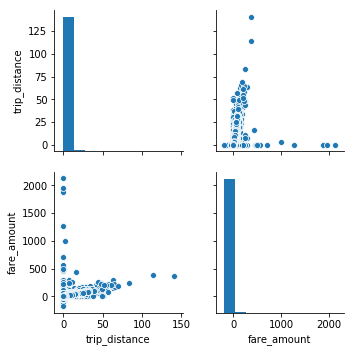

In [49]:
sns.pairplot(df1)

In [75]:
# sns.pairplot(data_xls)

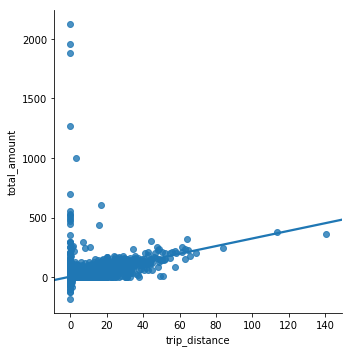

In [38]:
sns.lmplot(x="trip_distance", y="total_amount", data=data_xls, x_jitter=.05);

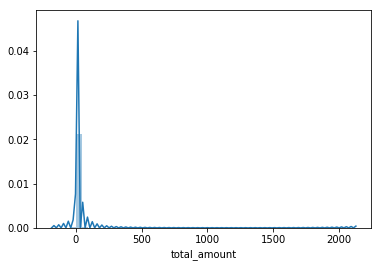

In [50]:
sns.distplot(data_xls['total_amount'])

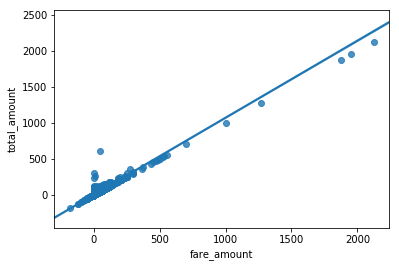

In [51]:
sns.regplot(x="fare_amount", y="total_amount", data=data_xls)

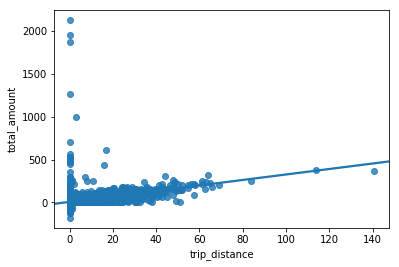

In [52]:
sns.regplot(x="trip_distance", y="total_amount", data=data_xls)

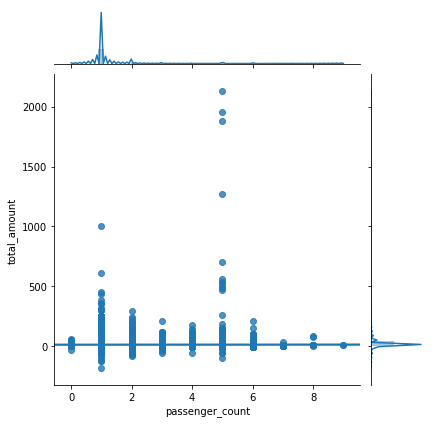

In [53]:
sns.jointplot(x="passenger_count", y="total_amount", data=data_xls, kind="reg")

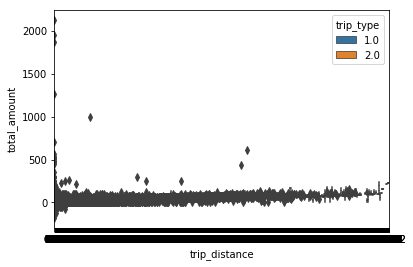

In [55]:
sns.boxplot(x="trip_distance", y="total_amount", hue="trip_type", data=data_xls)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000333A06D8>,
      dtype=object)

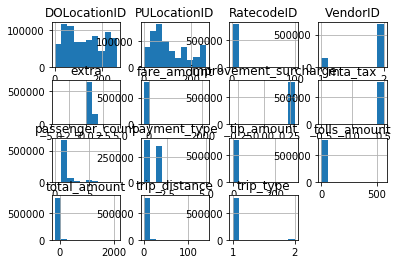

In [56]:
# Plotting the histogram
data_xls.hist()

In [ ]:
data_xls.groupby('total_amount').hist()

In [39]:
data_xls.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
VendorID,1.000000,-0.018102,0.008401,-0.001251,0.092104,0.024449,0.031129,-0.006734,-0.002079,-0.029719,0.001479,-0.003082,0.024435,-0.054485,-0.012279
RatecodeID,-0.018102,1.000000,0.056043,0.023705,-0.008791,0.046228,0.094818,-0.104791,-0.724162,-0.001841,0.027089,-0.710358,0.076432,0.041722,0.937916
PULocationID,0.008401,0.056043,1.000000,0.160510,0.017459,0.054496,0.043526,0.016584,-0.050710,0.022731,0.018792,-0.050318,0.045705,-0.006944,0.057118
DOLocationID,-0.001251,0.023705,0.160510,1.000000,0.006421,0.081727,0.069612,-0.009111,-0.012839,0.072450,0.014161,-0.014187,0.077096,-0.037394,0.020263
passenger_count,0.092104,-0.008791,0.017459,0.006421,1.000000,0.003049,0.006089,0.008839,0.006808,0.003340,0.007132,0.006515,0.007450,0.000338,-0.010348
trip_distance,0.024449,0.046228,0.054496,0.081727,0.003049,1.000000,0.815736,-0.046510,0.000471,0.312807,0.226666,0.006901,0.821364,-0.138584,0.021619
fare_amount,0.031129,0.094818,0.043526,0.069612,0.006089,0.815736,1.000000,-0.043465,-0.013743,0.273192,0.182370,-0.004206,0.979254,-0.142761,0.067395
extra,-0.006734,-0.104791,0.016584,-0.009111,0.008839,-0.046510,-0.043465,1.000000,0.143144,0.027688,-0.011167,0.142657,0.000696,-0.013914,-0.111163
mta_tax,-0.002079,-0.724162,-0.050710,-0.012839,0.006808,0.000471,-0.013743,0.143144,1.000000,0.026651,-0.015454,0.983917,0.007933,-0.133973,-0.791048
tip_amount,-0.029719,-0.001841,0.022731,0.072450,0.003340,0.312807,0.273192,0.027688,0.026651,1.000000,0.129161,0.032437,0.436925,-0.498141,-0.018603


In [40]:
model = ols("total_amount ~ fare_amount -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 4.161e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:27:08   Log-Likelihood:            -1.8350e+06
No. Observations:              793529   AIC:                         3.670e+06
Df Residuals:                  793528   BIC:                         3.670e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
fare_amount     1.1398      0.000   6450.631      0.000       1.139       1.140
==============================================================================
Omnibus:                  1686792.337   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     889227760786.708
Skew:                          16.905   Prob(JB):                         0.00
Kurtosis:                    5188.868   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
model = ols("total_amount ~ VendorID + RatecodeID + payment_type -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                 4.098e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:41:08   Log-Likelihood:            -3.0423e+06
No. Observations:              793529   AIC:                         6.085e+06
Df Residuals:                  793526   BIC:                         6.085e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
VendorID         6.9846      0.019    368.001      0.000       6.947       7.022
RatecodeID       3.3293      0.021    157.135      0.000       3.288       3.371
payment_type    -1.9156      0.021    -91.314      0.000      -1.957      -1.875
==============================================================================
Omnibus:                  2007676.729   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     551341307138.993
Skew:                          26.983   Prob(JB):                         0.00
Kurtosis:                    4086.161   Cond. No.                         5.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model = ols("total_amount ~ DOLocationID + mta_tax + trip_type-1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                 4.302e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:44:20   Log-Likelihood:            -3.0304e+06
No. Observations:              793526   AIC:                         6.061e+06
Df Residuals:                  793523   BIC:                         6.061e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
DOLocationID     0.0106      0.000     66.429      0.000       0.010       0.011
mta_tax          9.8620      0.090    109.016      0.000       9.685      10.039
trip_type        7.6990      0.045    172.527      0.000       7.612       7.786
==============================================================================
Omnibus:                  2049401.356   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     614087909561.956
Skew:                          28.494   Prob(JB):                         0.00
Kurtosis:                    4312.256   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
model = ols("total_amount ~ tip_amount + tolls_amount + trip_type -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                 6.365e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:38:28   Log-Likelihood:            -2.9272e+06
No. Observations:              793526   AIC:                         5.855e+06
Df Residuals:                  793523   BIC:                         5.855e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
tip_amount       2.4334      0.006    422.417      0.000       2.422       2.445
tolls_amount     2.4724      0.011    230.462      0.000       2.451       2.493
trip_type       10.9561      0.012    911.933      0.000      10.933      10.980
==============================================================================
Omnibus:                  2311264.742   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1779378891735.231
Skew:                          39.358   Prob(JB):                         0.00
Kurtosis:                    7338.577   Cond. No.                         2.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model = ols("total_amount ~ trip_distance + fare_amount -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.147e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:36:25   Log-Likelihood:            -1.8227e+06
No. Observations:              793529   AIC:                         3.645e+06
Df Residuals:                  793527   BIC:                         3.645e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
trip_distance     0.2595      0.002    158.128      0.000       0.256       0.263
fare_amount       1.0807      0.000   2622.132      0.000       1.080       1.082
==============================================================================
Omnibus:                  1912219.842   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     748811480828.747
Skew:                          23.552   Prob(JB):                         0.00
Kurtosis:                    4761.709   Cond. No.                         9.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking For Assumptions

In [46]:
#Is the relationship significant?
# As the p-value is much less than 0.05, we reject the null hypothesis that β = 0.
# Hence there is a significant relationship between the variables in the linear 
# regression model of the dataset.
# Hence, the model has a significant relationship.

#Are any model assumptions violated?
#1)Linear relationship :
# Plotting a Scatter plot
# Assumption 1: To check if their is a linear relationship in the model.
# Linear regression needs the relationship between the independent and dependent variables to be linear.  
# The linearity assumption can best be tested with scatter plots, 
# the following examples depict all the cases, where no and little linearity is present.

#2)Multivariate Normality:
#Plotting a Q-Q plot for the model
# Assumption 2: To check for multivariate normality in the model
# This assumption can best be checked with a Q-Q-Plot. 
# Normality can be checked with a goodness of fit test 
# Below graphs shows that the variables are multivariate normal

#3) No Multicollinearity:
#Multicollinearity may be tested with three central criteria:
# 1) Correlation matrix : All the values are <=1
# Hence, the model is near to accuracy

# 2)Test for tolerance: 
#     T = 1 – R² 
#       = 1 – 1
#       = 0
# With T < 0.1 there might be multicollinearity in the data. Hence, there is multicolinearity in the model. 
# Checking for Multicolinearity

Durbin-Watson’s d tests the null hypothesis while performing auto-correlation
# As a rule of thumb values of 1.5 < d < 2.5 show that there is no auto-correlation in the data






model = ols("total_amount ~ trip_distance + fare_amount + passenger_count -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.541e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:38:04   Log-Likelihood:            -1.7940e+06
No. Observations:              793529   AIC:                         3.588e+06
Df Residuals:                  793526   BIC:                         3.588e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
trip_distance       0.2619      0.002    165.437      0.000       0.259       0.265
fare_amount         1.0493      0.000   2511.525      0.000       1.048       1.050
passenger_count     0.4634      0.002    244.060      0.000       0.460       0.467
==============================================================================
Omnibus:                  1989971.957   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     813355182428.888
Skew:                          26.190   Prob(JB):                         0.00
Kurtosis:                    4962.525   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
model = ols("total_amount ~ trip_distance + tip_amount + mta_tax -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 2.065e+06
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:45:33   Log-Likelihood:            -2.5504e+06
No. Observations:              793529   AIC:                         5.101e+06
Df Residuals:                  793526   BIC:                         5.101e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
trip_distance     3.0006      0.002   1212.373      0.000       2.996       3.005
tip_amount        1.1752      0.004    312.909      0.000       1.168       1.183
mta_tax           9.5387      0.019    506.712      0.000       9.502       9.576
==============================================================================
Omnibus:                  3670257.811   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   80436848539513.672
Skew:                         164.420   Prob(JB):                         0.00
Kurtosis:                   49325.160   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model = ols("total_amount ~ trip_type + fare_amount + VendorID -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.615e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:47:26   Log-Likelihood:            -1.7758e+06
No. Observations:              793526   AIC:                         3.552e+06
Df Residuals:                  793523   BIC:                         3.552e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
trip_type       0.7024      0.011     66.848      0.000       0.682       0.723
fare_amount     1.0722      0.000   4274.953      0.000       1.072       1.073
VendorID        0.3635      0.006     64.019      0.000       0.352       0.375
==============================================================================
Omnibus:                  2028601.382   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     939365353269.454
Skew:                          27.541   Prob(JB):                         0.00
Kurtosis:                    5332.901   Cond. No.                         72.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
cols_to_use = ['trip_distance', 'fare_amount', 'passenger_count']
X = data_xls[cols_to_use]
y = data_xls.total_amount

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train

(        trip_distance  fare_amount  passenger_count
 570273           2.70         12.5                1
 511189           1.09          6.0                1
 259380           0.73          4.5                1
 534735           0.66          6.0                1
 388507           3.78         13.0                1
 424842           4.06         17.5                1
 174548           0.41          3.5                1
 38411            1.31          7.5                1
 303576           4.68         20.0                1
 80644            1.20          6.0                1
 673964           1.95          8.5                1
 745833           3.27         14.5                1
 452245           6.44         23.0                1
 135100           1.79          8.5                1
 326757           1.75          8.5                1
 495603           1.63          8.5                1
 766875           1.30          7.0                1
 696378           6.95         23.0           

# Fit the linear model

In [25]:
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

1.4463487385804576 [0.26277097 1.008416   0.01712764]


In [26]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.541e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:34:56   Log-Likelihood:            -1.7940e+06
No. Observations:              793529   AIC:                         3.588e+06
Df Residuals:                  793526   BIC:                         3.588e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
trip_distance       0.2619      0.002    165.437      0.000       0.259       0.265
fare_amount         1.0493      0.000   2511.525      0.000       1.048       1.050
passenger_count     0.4634      0.002    244.060      0.000       0.460       0.467
==============================================================================
Omnibus:                  1989971.957   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     813355182428.888
Skew:                          26.190   Prob(JB):                         0.00
Kurtosis:                    4962.525   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Part A: Decision Tree 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn import svm # SVM classifier
from sklearn.neural_network import MLPClassifier # MLP classifier
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
import warnings
warnings.filterwarnings('ignore')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data_xls = pd.read_csv('green_tripdata_2018-01.csv')
data_xls.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.0,0.0,NaN,0.3,7.3,2,1.0
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.0,0.0,NaN,0.3,15.8,2,1.0
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.0,0.0,NaN,0.3,11.3,2,1.0
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1.0
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.0,0.0,NaN,0.3,4.3,2,1.0


In [4]:
data_xls.groupby('store_and_fwd_flag').count()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
store_and_fwd_flag,,,,,,,,,,,,,,,,,,
N,792170,792170,792170,792170,792170,792170,792170,792170,792170,792170,792170,792170,792170,0,792170,792170,792170,792169
Y,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,0,1359,1359,1359,1357


In [5]:
data_xls.groupby('trip_type').count()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type
trip_type,,,,,,,,,,,,,,,,,,
1.0,779085,779085,779085,779085,779085,779085,779085,779085,779085,779085,779085,779085,779085,779085,0,779085,779085,779085
2.0,14441,14441,14441,14441,14441,14441,14441,14441,14441,14441,14441,14441,14441,14441,0,14441,14441,14441


In [4]:
data_xls.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,0.0,793529.000000,793529.000000,793529.000000,793526.000000
mean,1.826479,1.074520,110.042243,128.640492,1.362568,2.665767,11.735637,0.339561,0.487992,1.036160,0.085211,NaN,0.293034,14.004577,1.475495,1.018199
std,0.378697,0.565088,74.427252,77.165897,1.046734,2.845330,10.165305,0.395055,0.083866,1.894866,1.021389,NaN,0.049651,11.090961,0.521846,0.133669
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-183.000000,-4.500000,-0.500000,-2.720000,0.000000,NaN,-0.300000,-183.000000,1.000000,1.000000
25%,2.000000,1.000000,49.000000,61.000000,1.000000,0.990000,6.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,7.800000,1.000000,1.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.700000,9.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,10.800000,1.000000,1.000000
75%,2.000000,1.000000,166.000000,193.000000,1.000000,3.270000,14.000000,0.500000,0.500000,1.760000,0.000000,NaN,0.300000,16.800000,2.000000,1.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,140.620000,2126.000000,4.500000,0.500000,295.000000,557.550000,NaN,0.300000,2126.800000,5.000000,2.000000


In [7]:
data_xls.groupby('store_and_fwd_flag').median()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
store_and_fwd_flag,,,,,,,,,,,,,,,,
N,2,1,82,129,1,1.7,9.0,0.0,0.5,0.0,0.0,NaN,0.3,10.8,1,1.0
Y,1,1,82,129,1,1.6,8.5,0.5,0.5,0.0,0.0,NaN,0.3,10.3,2,1.0


In [8]:
data_xls.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [3]:
cols_to_use = ['VendorID',
       'passenger_count', 'trip_distance', 'fare_amount', 'mta_tax',
       'tip_amount', 'tolls_amount', 'payment_type', 'trip_type']
X = data_xls[cols_to_use]
y = data_xls.total_amount

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train


(        VendorID  passenger_count  trip_distance  fare_amount  mta_tax  \
 570273         1                1           2.70         12.5      0.5   
 511189         2                1           1.09          6.0      0.5   
 259380         2                1           0.73          4.5      0.5   
 534735         2                1           0.66          6.0      0.5   
 388507         2                1           3.78         13.0      0.5   
 424842         2                1           4.06         17.5      0.5   
 174548         2                1           0.41          3.5      0.5   
 38411          2                1           1.31          7.5      0.5   
 303576         2                1           4.68         20.0      0.5   
 80644          1                1           1.20          6.0      0.5   
 673964         2                1           1.95          8.5      0.5   
 745833         2                1           3.27         14.5      0.5   
 452245         2        

In [133]:
# Random Forest classifier

RFm = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)
                                
# Random Forest cross validation

print("KfoldCrossVal mean score using Random Forest is %s" %cross_val_score(RFm,X,y,cv=10).mean())

# Random Forest metrics
sm = RFm.fit(X_train, y_train)

# y_pred = sm.predict(X_test)
# print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))

In [12]:
data_xls.dtypes

VendorID                   int64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                float64
dtype: object

In [27]:
X = data_xls.iloc[:, 8].values # Here first : means fetch all rows :-1 means except last column
Y = data_xls.iloc[:, 14].values # : is fetch all rows 3 means 3rd column

# random_state below is a metric that is used by the function to shuffle datas while splitting. If you change the random_state
# then your split may not be same as previous
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) # 0.2 test_size means 20%

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(634823,) (634823,)
(158706,) (158706,)


# Cleaning of the dataset

In [21]:
def data_cleaning(X_train):
    train["trip_type"] = train["trip_type"].fillna(train["trip_type"].median())
    train["Fare"] = train["Age"].fillna(train["Fare"].median())
   
    X_train.loc[train["trip_type"] == "Street-hail", "trip_type"] = 0
    X_train.loc[train["trip_type"] == " Dispatch", "trip_type"] = 1
    
    X_train.loc[train["VendorID"] == "Creative Mobile Technologies", "VendorID"] = 0
    X_train.loc[train["VendorID"] == " VeriFone Inc", "VendorID"] = 1

    return X_train

In [26]:
data_xls

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,1,236,236,5,0.70,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2,1.0
1,2,1,43,42,5,3.50,14.5,0.5,0.5,0.00,0.0,0.3,15.80,2,1.0
2,2,1,74,152,1,2.14,10.0,0.5,0.5,0.00,0.0,0.3,11.30,2,1.0
3,2,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.00,0.0,-0.3,-4.30,3,1.0
4,2,1,255,255,1,0.03,3.0,0.5,0.5,0.00,0.0,0.3,4.30,2,1.0
5,2,1,255,161,1,5.63,21.0,0.5,0.5,0.00,0.0,0.3,22.30,2,1.0
6,2,1,189,65,5,1.71,8.5,0.5,0.5,0.00,0.0,0.3,9.80,2,1.0
7,2,1,189,225,5,3.45,14.5,0.5,0.5,3.16,0.0,0.3,18.96,1,1.0
8,2,1,129,82,1,1.61,10.0,0.5,0.5,0.00,0.0,0.3,11.30,2,1.0
9,2,1,226,7,1,1.87,7.5,0.5,0.5,0.00,0.0,0.3,8.80,2,1.0


 Choosing the predictor variables

In [41]:
predictor_Vars = ["VendorID", "RatecodeID", "PULocationID", "DOLocationID", "passenger_count", "payment_type"]

 Choosimg model parameters

In [42]:
from sklearn.ensemble import RandomForestClassifier
modelRandom = RandomForestClassifier(n_estimators=1000,max_depth=4,max_features=3,random_state=123)

5 fold crossvalidation

In [44]:
from sklearn import cross_validation
modelRandomCV= cross_validation.cross_val_score(modelRandom,X_train[predictor_Vars],X_train["passenger_count"],cv=5)


In [3]:
cols_to_use = ["VendorID", "RatecodeID", "PULocationID", "DOLocationID", "passenger_count", "payment_type"]
X = data_xls[cols_to_use]
y = data_xls.total_amount

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train

(        VendorID  RatecodeID  PULocationID  DOLocationID  passenger_count  \
 570273         1           1           242             3                1   
 511189         2           1           129           129                1   
 259380         2           1           181           181                1   
 534735         2           1           129            82                1   
 388507         2           1           223            70                1   
 424842         2           1            75           100                1   
 174548         2           1            75            75                1   
 38411          2           1           129           129                1   
 303576         2           1           243            75                1   
 80644          1           1           247           247                1   
 673964         2           1            33           148                1   
 745833         2           1            61           189       

##### Checking the accuracy metric of each of the five folds

In [45]:
modelRandomCV

array([0.9800816 , 0.98006553, 0.98035679, 0.98024637, 0.98037177])

Plotting the Random Forest Model

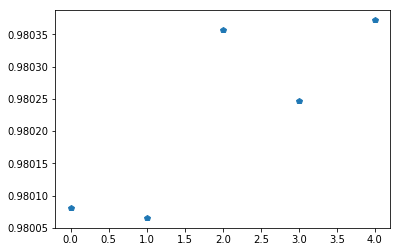

In [46]:
plt.plot(modelRandomCV,"p")

In [47]:
print(modelRandomCV.mean())

0.9802244111289046


# Hyperparamters of Random Forest

In [48]:
kj modelRandom = RandomForestClassifier(n_estimators=1000,max_depth=4,max_features=3,random_state=123)
modelRandom.fit(X_train[predictor_Vars], X_train.passenger_count)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [50]:
predictions=modelRandom.predict(X_test[predictor_Vars])

In [51]:
# Printing the Random Forest Model results 
print(modelRandomCV.mean())

0.9802244111289046


In [143]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [145]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [5]:
from sklearn.ensemble import RandomForestRegressor


In [6]:
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator =
                               rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [7]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


In [8]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

The Important Hyperparameters 

1) n_estimators:
It defines the number of decision trees to be created in a random forest.
Generally, a higher number makes the predictions stronger and more stable,
but a very large number can result in higher training time.


2) criterion:
It defines the function that is to be used for splitting.
The function measures the quality of a split for each feature and chooses the best split.

   

3) max_features :
It defines the maximum number of features allowed for the split in each decision tree.
Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.


4) max_depth:
Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.


In [11]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [12]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions 
                               = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42,
                               n_jobs = -1)

In [ ]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


# Best Hyperparameters


In [ ]:
rf_random.best_params_

Best_hyperparameters:
    {
        'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
    }

# Algorithms based on Boosting

### 1.AdaBoost
### 2.GBM
### 3.XGB

# Gradient Boosting Classification

In [54]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier


In [55]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [56]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)                 

0.913

In [66]:
from sklearn.ensemble import BaggingClassifier

BaggingClassifier?

In [59]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier(n_neighbors=3)

In [60]:
bag = BaggingClassifier(
    m, 
    max_samples=.5, 
    max_features=2, 
    n_jobs=2,
    oob_score=True)

Important Hyperparameters:
    
1) min_samples_split
Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
Used to control over-fitting. 

2) min_samples_leaf
Defines the minimum samples required in a terminal or leaf node.
Generally, lower values should be chosen for imbalanced class problems because the 
regions in which the minority class will be in the majority will be very small.


3)min_weight_fraction_leaf
Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
max_depth
The maximum depth of a tree.
Used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample.
Should be tuned using CV.


4)max_leaf_nodes
The maximum number of terminal nodes or leaves in a tree.
Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
If this is defined, GBM will ignore max_depth.
max_features
The number of features to consider while searching for the best split. These will be randomly selected.
As a thumb-rule, the square root of the total number of features works great but we should check up to 30-40% of the total number of features.
Higher values can lead to over-fitting but it generally depends on a case to case scenario.

# Hyperparameters

In [61]:
bag.fit(X, y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=2,
         max_samples=0.5, n_estimators=10, n_jobs=2, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [62]:
bag.oob_score_

0.6605

In [63]:
bag.predict([X[0]])

array([-1.])

In [64]:
bag.predict_proba([X[0]])

array([[0.53333333, 0.46666667]])

In [65]:
bag.score(X, y)

0.8731666666666666

# Adaptive Boosting

In [76]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoostClassifier?

In [77]:
m = AdaBoostClassifier(base_estimator=None, n_estimators=100)

In [78]:
m.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

#### Best Hyperparameters for Boosting algorithm are:
    1) base_estimators
    2) n_estimators
    3)learning_rate

In [79]:
m.score(X, y)

0.9425

# Xgboost

In [80]:
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [81]:
y_pred = classifier.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [83]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

0.020812497518394407

In [84]:
#Xgboosting for Regression
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [87]:
X, y = data_xls.iloc[:,:-1],data_xls.iloc[:,-1]

In [89]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [96]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [98]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [99]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [100]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [101]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [102]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.74%


According to the above performed algorithms, Bagging algorithm attempts to give good results which has accuracy 98% while 
Boosting algorithm has 87% accuracy. Therefore, the random forest bagging algorithm works best for the test data.

#  Part B: Classification with Logistic Regression 

In [103]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import cross_validation


import matplotlib.pyplot as plt
%matplotlib inline

### Important Variables

In [117]:
predictor_Vars = ["VendorID", "RatecodeID", "PULocationID", "DOLocationID", "passenger_count", "payment_type", "total_amount", "trip_type", "fare_amount", "tip_amount"]

In [118]:
# Logistic Regression 
modelLogistic = linear_model.LogisticRegression()

In [119]:
# Cross-validation
modelLogisticCV= cross_validation.cross_val_score(modelLogistic,X,y,cv=5)

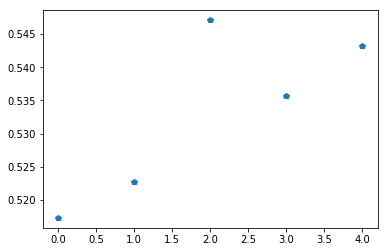

In [120]:
# Plotting the ROC curve
plt.plot(modelLogisticCV,"p")

In [121]:
print(modelLogisticCV.mean())


0.5331698999571586


In [122]:
#Fitting the model
modelLogistic = linear_model.LogisticRegression()
modelLogistic.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
predictions=modelLogistic.predict
predictions

<bound method LinearClassifierMixin.predict of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


In [128]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1550  196]
 [1470  384]]


The result is telling us that we have 1550+384 correct predictions and 196+1470 incorrect predictions.

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       -1.0       0.51      0.89      0.65      1746
        1.0       0.66      0.21      0.32      1854

avg / total       0.59      0.54      0.48      3600



In [130]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [131]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

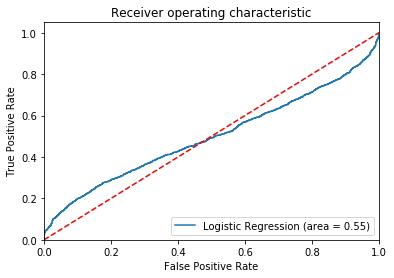

In [132]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

# Checking for Multicollinearity

In [5]:
X_train.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,payment_type
VendorID,1.000000,-0.018586,0.008039,-0.001546,0.091757,-0.054571
RatecodeID,-0.018586,1.000000,0.058651,0.024433,-0.008905,0.043404
PULocationID,0.008039,0.058651,1.000000,0.160859,0.017203,-0.007016
DOLocationID,-0.001546,0.024433,0.160859,1.000000,0.005288,-0.037440
passenger_count,0.091757,-0.008905,0.017203,0.005288,1.000000,0.000700
payment_type,-0.054571,0.043404,-0.007016,-0.037440,0.000700,1.000000


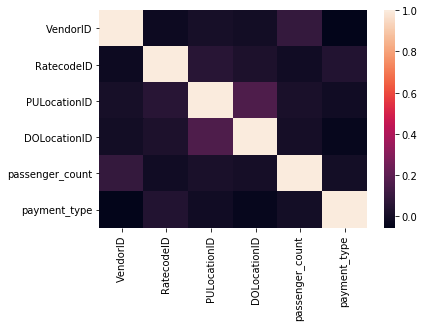

In [6]:
sns.heatmap(X_train.corr())

2)Test for tolerance:
 T = 1 – R² 
   = 1 – 0.983
   = 0.017
With T < 0.1 there might be multicollinearity in the data. Hence, there is no multicolinearity in the model.





Checking for Multicolinearity
3) Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression
is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present;
with VIF > 100 there is certainly multicollinearity among the variables.
VIF = 1/ 0.017 = 588.2352941176471 In the above model, Multicollinearity is not present.


Check for Autocorrelation
Durbin-Watson’s d tests the null hypothesis while performing auto-correlation Value of d = 1.7 As a rule of thumb values of 1.5 < d < 2.5 show that there is no auto-correlation in the data


Based on the above results, Logistic Regression with Classification gives results with are less accurate than the model compared 
with part A. The results for Logistic Regression are 54% while those for part A models are much better.

# Logistic Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
data_xls.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.0,0.0,NaN,0.3,7.3,2,1.0
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.0,0.0,NaN,0.3,15.8,2,1.0
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.0,0.0,NaN,0.3,11.3,2,1.0
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1.0
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.0,0.0,NaN,0.3,4.3,2,1.0


In [137]:
data_xls['payment_type'].unique()

array([2, 3, 1, 4, 5], dtype=int64)

In [151]:
count_no_sub = len(data_xls[data_xls['passenger_count']==0])
count_sub = len(data_xls[data_xls['passenger_count']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of payment type is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of payment type", pct_of_sub*100)

percentage of payment type is 0.025748798885508635
percentage of payment type 99.9742512011145


In [142]:
data_xls.groupby('payment_type').mean()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type
payment_type,,,,,,,,,,,,,,
1,1.838104,1.055641,110.555408,131.253691,1.359512,3.032055,13.025851,0.340451,0.493070,1.941302,0.110273,0.296073,16.257094,1.012861
2,1.820385,1.093007,109.444642,125.784390,1.368403,2.258095,10.354182,0.342487,0.487446,0.000025,0.056768,0.292695,11.534217,1.023766
3,1.357051,1.274852,109.342923,117.022348,1.226817,1.395777,3.630730,0.086052,0.127151,0.006260,0.030663,0.078217,3.954295,1.048574
4,1.315951,1.349693,112.177914,116.974847,1.183436,1.662528,4.790798,0.059816,0.154908,0.006687,0.059436,0.093497,5.163945,1.083436
5,1.000000,1.653846,104.134615,97.269231,1.134615,3.036538,9.682692,0.336538,0.413462,0.000000,0.201923,0.253846,10.888462,1.153846


In [143]:
data_xls['total_amount'].unique()

array([ 7.3 , 15.8 , 11.3 , ..., 27.57, 52.97,  6.44])

In [145]:
data_xls['RatecodeID'].unique()

array([ 1,  5,  2,  3,  4,  6, 99], dtype=int64)

In [148]:
data_xls['passenger_count'].unique()

array([5, 1, 2, 4, 6, 3, 0, 8, 7, 9], dtype=int64)

Text(0,0.5,'Frequency of Trip')

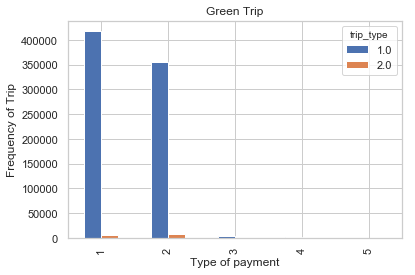

In [155]:
%matplotlib inline
pd.crosstab(data_xls.payment_type,data_xls.trip_type).plot(kind='bar')
plt.title('Green Trip')
plt.xlabel('Type of payment')
plt.ylabel('Frequency of Trip')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Frequency of Trip')

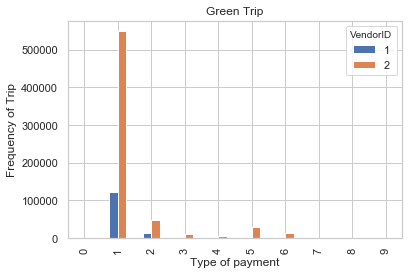

In [156]:
%matplotlib inline
pd.crosstab(data_xls.passenger_count,data_xls.VendorID).plot(kind='bar')
plt.title('Green Trip')
plt.xlabel('Type of payment')
plt.ylabel('Frequency of Trip')
# plt.savefig('purchase_fre_job')

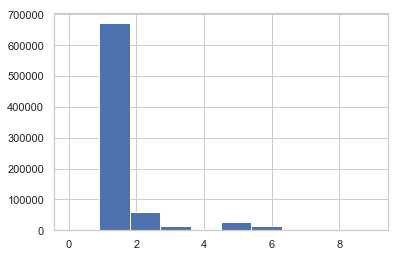

In [157]:
data_xls.passenger_count.hist()

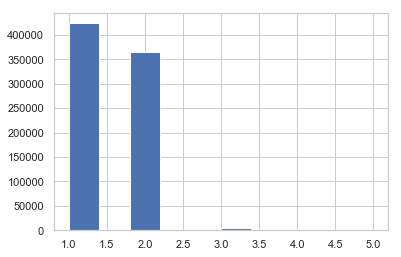

In [159]:
data_xls.payment_type.hist()

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [173]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


In [174]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1550  196]
 [1470  384]]


In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       -1.0       0.51      0.89      0.65      1746
        1.0       0.66      0.21      0.32      1854

avg / total       0.59      0.54      0.48      3600



# Part C: Regression with Random Forest

In [199]:
from sklearn.tree import DecisionTreeRegressor as dtr
# define the training data X...
cols_to_use = ["VendorID", "RatecodeID", "PULocationID", "DOLocationID", "passenger_count", "payment_type"]
X = data_xls[cols_to_use]
y = data_xls.passenger_count
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train
X_test = X_test[["VendorID", "RatecodeID", "PULocationID", "DOLocationID", "passenger_count", "payment_type"]]
print(X,y)



        VendorID  RatecodeID  PULocationID  DOLocationID  passenger_count  \
0              2           1           236           236                5   
1              2           1            43            42                5   
2              2           1            74           152                1   
3              2           1           255           255                1   
4              2           1           255           255                1   
5              2           1           255           161                1   
6              2           1           189            65                5   
7              2           1           189           225                5   
8              2           1           129            82                1   
9              2           1           226             7                1   
10             2           1           145           129                2   
11             2           1             7           223                2   

In [201]:
# let's set up some cross-validation analysis to evaluate our model and later models...
from sklearn.model_selection import cross_val_score
# try fitting a decision tree regression model...
DTR_1 = dtr(max_depth=None) # declare the regression model form. Let the depth be default.
DTR_1.fit(X,Y) # fit the training data
scores_dtr = cross_val_score(DTR_1, X, y, cv=10,scoring='explained_variance') # 10-fold cross validation
print('scores for k=10 fold validation:',scores_dtr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))

scores for k=10 fold validation: [1.         1.         0.99998834 1.         1.         1.
 1.         1.         1.         1.        ]
Est. explained variance: 1.00 (+/- 0.00)


In [209]:
from sklearn.ensemble import RandomForestRegressor as rfr
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
# yt = [i for i in y['RatecodeID']] # quick pre-processing of the target
np.random.seed(11111)
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X,y,cv=10,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting

estimators: 2
Est. explained variance: 1.00 (+/- 0.00)

estimators: 5
Est. explained variance: 1.00 (+/- 0.00)

estimators: 10
Est. explained variance: 1.00 (+/- 0.00)

estimators: 15
Est. explained variance: 1.00 (+/- 0.00)

estimators: 20
Est. explained variance: 1.00 (+/- 0.00)

estimators: 25
Est. explained variance: 1.00 (+/- 0.00)

estimators: 30
Est. explained variance: 1.00 (+/- 0.00)

estimators: 35
Est. explained variance: 1.00 (+/- 0.00)

estimators: 40
Est. explained variance: 1.00 (+/- 0.00)

estimators: 45
Est. explained variance: 1.00 (+/- 0.00)

estimators: 50
Est. explained variance: 1.00 (+/- 0.00)

estimators: 55
Est. explained variance: 1.00 (+/- 0.00)

estimators: 60
Est. explained variance: 1.00 (+/- 0.00)

estimators: 65
Est. explained variance: 1.00 (+/- 0.00)

estimators: 70
Est. explained variance: 1.00 (+/- 0.00)

estimators: 75
Est. explained variance: 1.00 (+/- 0.00)

estimators: 80
Est. explained variance: 1.00 (+/- 0.00)



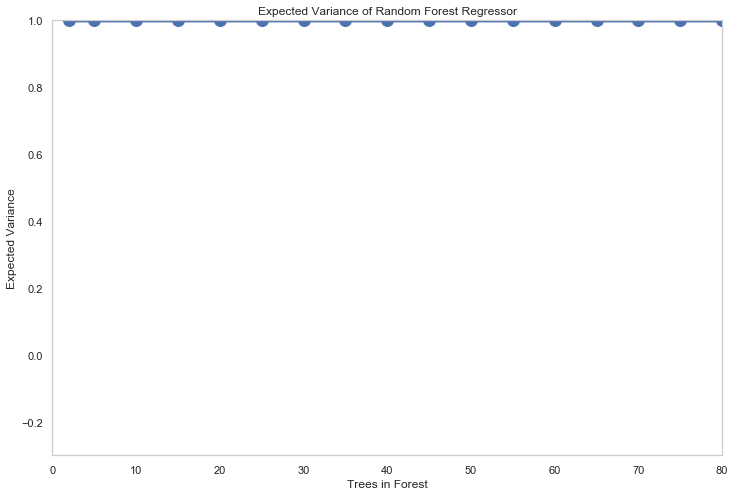

In [210]:
# and plot...
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfrs,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.3,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()

# Hyperparameters for Random Forest 
bootstrap=True,
criterion='mse',
max_depth=30,
max_features='sqrt',
max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_impurity_split=None,
min_samples_leaf=2,
min_samples_split=5,
min_weight_fraction_leaf=0.0, 
n_estimators=200, n_jobs=1,
oob_score=False, 
random_state=None, 
verbose=0, warm_start=False)

In [ ]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Xgboosting with Regression

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [19]:
X, y = data_xls.iloc[:,:-1],data_xls.iloc[:,-1]

In [20]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [22]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [23]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.534711


In [28]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}



In [29]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[10:15:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:15:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:15:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:15:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:15:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:15:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[10:15:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

KeyError: 'best_msg'

In [88]:
from sklearn.learning_curve import learning_curve 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV 
from sklearn.datasets import make_classification
from sklearn.cross_validation import ShuffleSplit, train_test_split 

In [119]:
cols_to_use = ["VendorID", "RatecodeID", "PULocationID", "DOLocationID", "passenger_count", "payment_type"]
X = data_xls[cols_to_use]
y = data_xls.total_amount

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train

(        VendorID  RatecodeID  PULocationID  DOLocationID  passenger_count  \
 570273         1           1           242             3                1   
 511189         2           1           129           129                1   
 259380         2           1           181           181                1   
 534735         2           1           129            82                1   
 388507         2           1           223            70                1   
 424842         2           1            75           100                1   
 174548         2           1            75            75                1   
 38411          2           1           129           129                1   
 303576         2           1           243            75                1   
 80644          1           1           247           247                1   
 673964         2           1            33           148                1   
 745833         2           1            61           189       

In [56]:
gbrt=GradientBoostingRegressor(n_estimators=100)
gbrt.fit(X_train, y_train) 
y_pred=gbrt.predict(X_test) 

In [57]:
#One of the benefits of growing trees is that we can understand how important each of the features are
print ("Feature Importances")
print (gbrt.feature_importances_) 
print 

# #Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is
# #able to decipher. 
# print ("R-squared for Train: {%.2f}") %gbrt.score(X_train, y_train)
# print ("R-squared for Test:{ %.2f}") %gbrt.score(X_test, y_test) 

Feature Importances
[0.02263225 0.09200841 0.149537   0.6283778  0.0127113  0.09473324]


<function print>

In [79]:
#Defining this as a function so we can call it anytime we want
def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingRegressor()
#Choose cross-validation generator - let's choose ShuffleSplit which randomly shuffles and selects Train and CV sets #for each iteration. There are other methods like the KFold split.
    cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2) 
#Apply the cross-validation iterator on the Training set using GridSearchCV. This will run the classifier on the #different train/cv splits using parameters specified and return the model that has the best results
#Note that we are tuning based on the F1 score 2PR/P+R where P is Precision and R is Recall. This may not always be #the best score to tune our model on. 
    
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print ("Best Estimator learned through GridSearch")
    print (classifier.best_estimator_) 



In [94]:
param_grid={'n_estimators':[100],
            'learning_rate': [0.1],# 0.05, 0.02, 0.01],
            'max_depth':[6],#4,6],
            'min_samples_leaf':[3],#,5,9,17], 
            'max_features':[1.0],#,0.3]#,0.1]
           } 
n_jobs=4 


In [89]:
#Let's fit GBRT to the digits training dataset by calling the function we just created.
cv,best_est=GradientBooster(param_grid, n_jobs) 

Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


TypeError: cannot unpack non-iterable NoneType object

In [113]:
# #OK great, so we got back the best estimator parameters as follows: 
# print ("Best Estimator Parameters")
# print("---------------------------")
# print ("n_estimators: %d") %best_est.n_estimators
# print ("max_depth: %d") %best_est.max_depth
# print ("Learning Rate: %.1f") %best_est.learning_rate
# print ("min_samples_leaf: %d") %best_est.min_samples_leaf
# print ("max_features: %.1f") %best_est.max_features

# print
# print ("Train R-squared: %.2f") %best_est.score(X_train,y_train) 

# Adaptive Boosting

In [124]:
from sklearn.ensemble import AdaBoostRegressor


In [125]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.025846948264273917

# XGBoosting with Regression

In [105]:
import xgboost as xgb

In [122]:
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.2676613219646127

In [110]:
from sklearn.ensemble import GradientBoostingRegressor


In [112]:
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.2691145970069959

In [127]:
import lightgbm as lgb

In [128]:
train_data=lgb.Dataset(X_train,label=y_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)

In [129]:
from sklearn.metrics import mean_squared_error

In [133]:
rmse=mean_squared_error(y_pred,y_test)**0.5
print(rmse)

9.271246853910203


In [136]:
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(X_test)
for i in range(0,185):
    if y_pred[i]>=0.5: 
        y_pred[i]=1
else: 
    y_pred[i]=0

In [140]:
print(model)
print(y_pred)

[ 1.          1.          1.         ... 13.80335465 13.80335465
 13.8071983 ]


# Hyperparameters for Boosting with Regression


GradientBoostingRegressor:
alpha=0.9,
learning_rate=0.1, 
max_depth=6,
max_features=1.0,
max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_impurity_split=None,
min_samples_leaf=3,
min_samples_split=2,
min_weight_fraction_leaf=0.0,
n_estimators=100

             

Comparing the results with two algorithms,the Results for Random Forest have given better answers and better variance.

# Part 4: Linear Regression

Linear Regression is already completed and has results with high, low and intermediate parameters. 
By comparing it with the models in Part C, the model performs linear regression better and has much better results and 
assumptions.
The model does not have multicollinearity in the dataset.
Hence, model D performs better and has effictive reults after fitting, predicting and performing the interaction effect.